In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import glob
import os
import seaborn as sns
os.getcwd()

'/home/owaismujtaba/projects/mind-voice'

In [9]:
folder_path = "results/DecodingResults/"
pattern = os.path.join(folder_path, "sub-*_ses-*_confusion_matrix.csv")

# Find all matching files
csv_files = glob.glob(pattern)

# Load and aggregate confusion matrices
confusion_matrices = []
for file in csv_files:
    df = pd.read_csv(file)
    confusion_matrices.append(df.values)

# Convert to numpy array and sum
aggregated_confusion = np.sum(confusion_matrices, axis=0)


In [10]:
aggregated_confusion

array([[2001,   87,  106],
       [ 327, 1549,  319],
       [ 385,  430, 1380]])

In [11]:
labels = ["Overt", "Covert", "Rest"]

In [12]:
aggregated_confusion = pd.DataFrame(aggregated_confusion, columns=labels)
aggregated_confusion.index = labels

In [13]:
aggregated_confusion

,Overt,Covert,Rest
Overt,2001,87,106
Covert,327,1549,319
Rest,385,430,1380


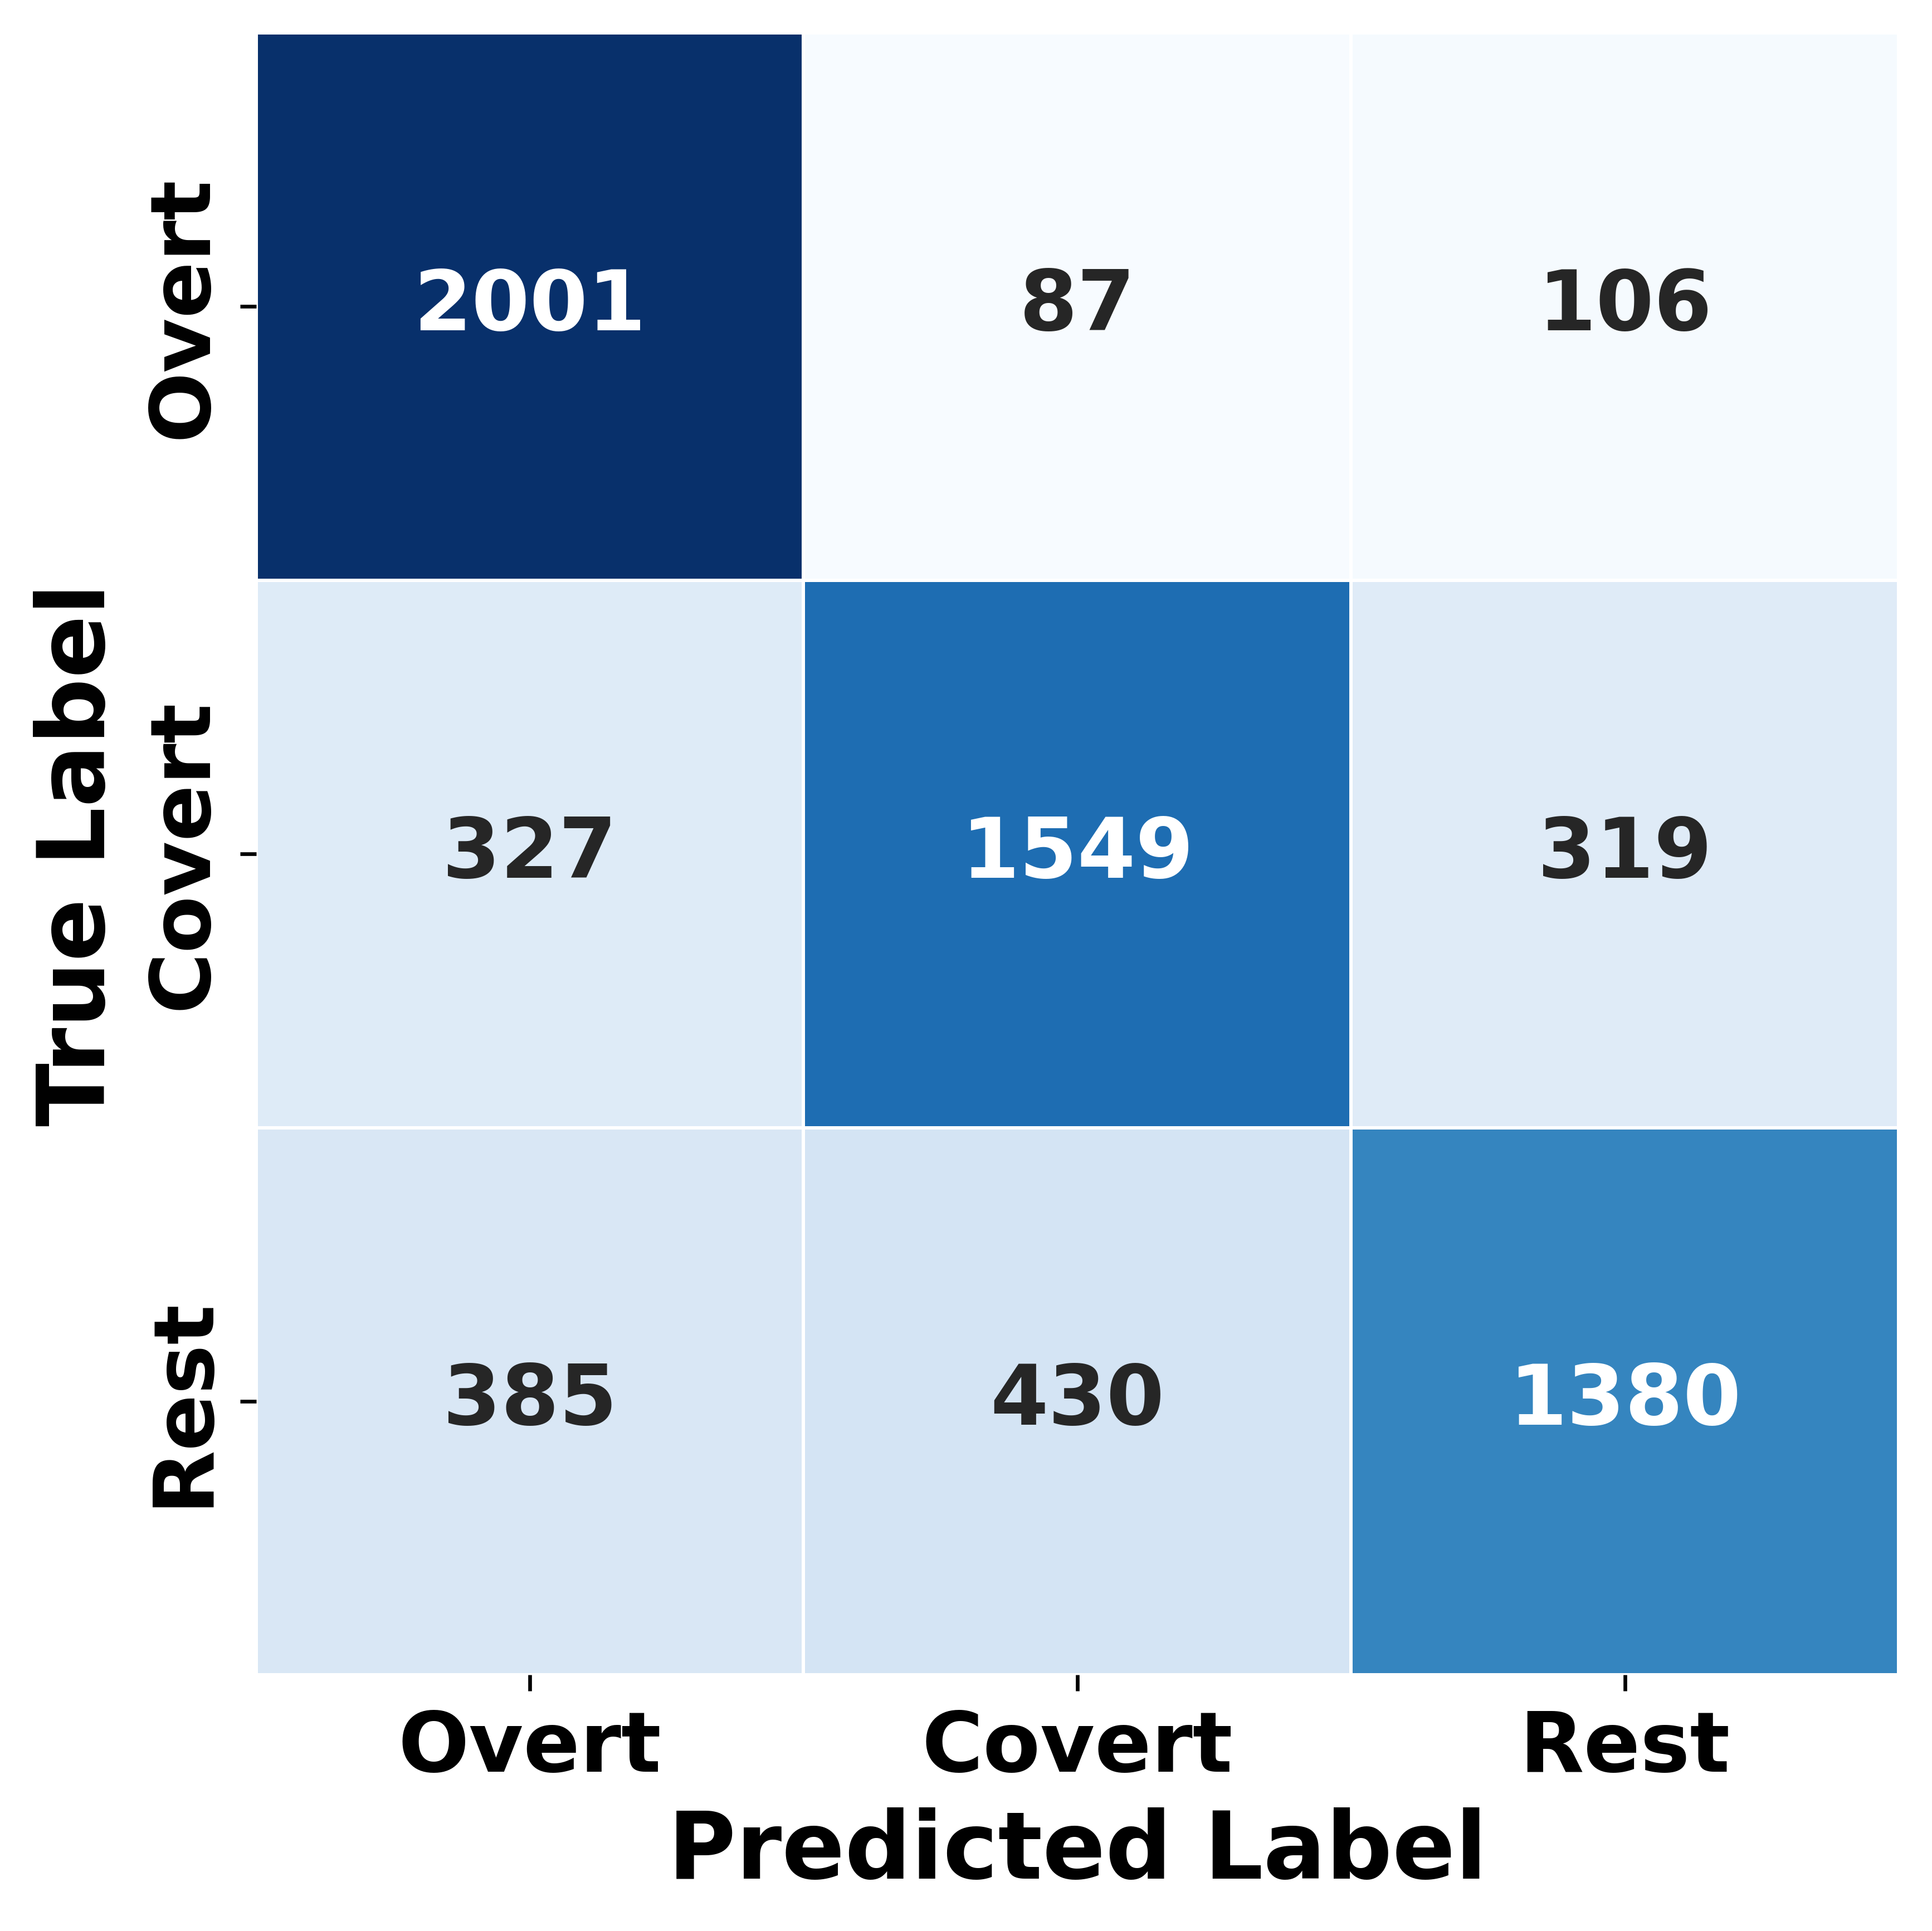

In [15]:
import matplotlib.pyplot as plt

# Global plot settings
plt.rcParams.update({
    "font.size": 14,         # increase general font size
    "axes.labelsize": 20,    # axis label font size
    "axes.titlesize": 18,    # title font size
    "xtick.labelsize": 18,   # x tick labels
    "ytick.labelsize": 18,   # y tick labels
    "figure.dpi": 600,       # high-resolution figure
})

# Example heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    aggregated_confusion,
    annot=True,              
    fmt=".0f",               
    annot_kws={"size": 18, "weight": "bold"},  
    cmap="Blues",
    cbar=False,
    square=True,
    linewidths=0.5
)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.xlabel("Predicted Label", fontweight='bold')
plt.ylabel("True Label", fontweight='bold')
plt.tight_layout()
plt.savefig('results/images/cm.pdf',format='pdf', dpi=800)
